<a href="https://colab.research.google.com/github/2300032005klu/ZeroOneCodeClub_FirstWebDevProject/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Introduction***

In educational institutions, identifying students who are at risk of underperforming is critical for timely intervention and support. Early detection can help faculty provide personalized guidance, improve student outcomes, and reduce dropout rates. This project focuses on predicting student performance in final exams by analyzing multiple factors such as attendance records, internal assessment marks, assignment scores, and extracurricular activities. By leveraging data analytics and machine learning techniques, the system aims to provide actionable insights and alerts to educators, enabling them to proactively assist students who may need additional help.

***Technologies and Tools Used***

This project leverages the following tools and technologies:

Python: Core programming language used for data processing and model development.

Pandas: For data cleaning, exploration, and manipulation of student-related data such as marks, attendance, and activities.

NumPy: For numerical operations and efficient handling of arrays and statistical computations.

Scikit-learn: For feature engineering, model training (e.g., classification or regression), and performance evaluation using metrics such as accuracy, precision, recall, and F1-score.

Natural Language Processing (NLP) (optional): Can be used if any textual data like feedback or comments is included for sentiment or keyword analysis.

Jupyter Notebook: For interactive code development, data visualization, and documenting results in a readable format.

Matplotlib/Seaborn (optional): For visualizing correlations, distributions, and patterns in features like attendance, internal scores, and exam performance.

***Data Description***

The dataset contains various features that influence student performance. Below is a description of each feature:

| Feature Name                | Description                                                  |
|----------------------------|--------------------------------------------------------------|
| Student_ID                 | Unique identifier for each student                          |
| Attendance_Percentage      | Percentage of classes attended by the student               |
| Internal_Marks             | Average marks obtained in internal assessments              |
| Assignment_Scores          | Average scores in submitted assignments                     |
| Quiz_Scores                | Average scores in quizzes conducted during the semester      |
| Project_Scores             | Marks awarded for project work                              |
| Extracurricular_Score      | Score based on participation in extracurricular activities  |
| Previous_Semester_Performance | Final grade or percentage from previous semester       |
| Class_Participation        | Score based on involvement in class discussions             |
| Study_Hours_Per_Week       | Average number of hours spent studying per week             |
| Final_Exam_Score           | Score obtained in the final exam (target variable)          |


In [24]:
# Installing neccessary libraries here
! pip install pandas
! pip install numpy
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix




In [5]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


In [6]:
df = pd.read_csv("StudentsPerformance.csv")  # or student-mat.csv if you used UCI
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
df.columns

Index(['student_id', 'gender', 'race/ethnicity', 'parental level of education',
       'lunch', 'test preparation course', 'math score', 'reading score',
       'writing score', 'avg_score', 'pass', 'total_score', 'cluster'],
      dtype='object')

In [7]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [9]:
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['avg_score'].apply(lambda x: 1 if x >= 50 else 0)  # Adjust threshold if needed


In [10]:
X = df.drop(['pass', 'avg_score'], axis=1)
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.985
Confusion Matrix:
 [[ 24   3]
 [  0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.98      1.00      0.99       173

    accuracy                           0.98       200
   macro avg       0.99      0.94      0.97       200
weighted avg       0.99      0.98      0.98       200



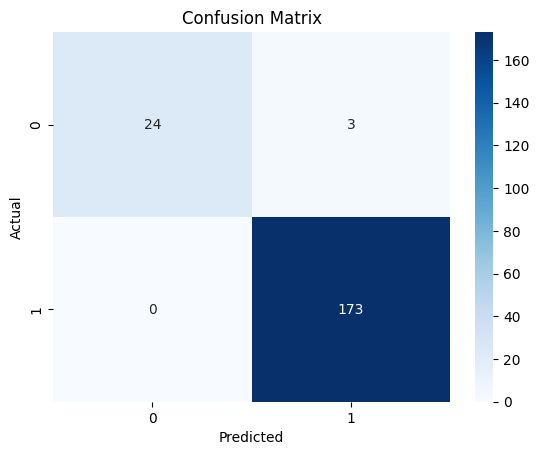

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]


In [17]:
df["pass"] = df["total_score"].apply(lambda x: 1 if x >= 180 else 0)



To fix the error, I will perform KMeans clustering on the `total_score` and add the cluster labels to the DataFrame.

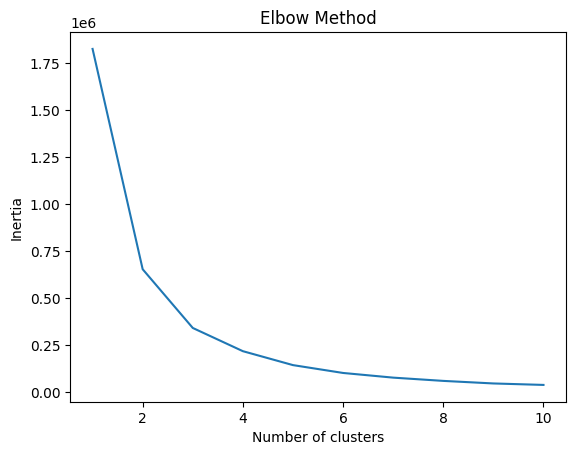

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
X = df[['total_score']]
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method (visual inspection), let's choose 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# Now you can run the cell that caused the error

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Add total score
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]

# Normalize and cluster
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[["math score", "reading score", "writing score"]])

kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_features)

# Add index as student_id
df.reset_index(inplace=True)
df.rename(columns={"index": "student_id"}, inplace=True)


In [22]:
def recommend_similar_students(student_id, n=5):
    """
    Recommend similar students in the same performance cluster.
    """
    if student_id not in df["student_id"].values:
        return f"Student ID {student_id} not found."

    cluster_id = df[df["student_id"] == student_id]["cluster"].values[0]

    similar = df[(df["cluster"] == cluster_id) & (df["student_id"] != student_id)]
    top_n = similar[["student_id", "math score", "reading score", "writing score", "total_score"]]\
              .sort_values(by="total_score", ascending=False).head(n)
    return top_n


In [23]:
print(f"Recommended students similar to student ID 10:")
print(recommend_similar_students(10, n=5))


Recommended students similar to student ID 10:
     student_id  math score  reading score  writing score  total_score
663         663          65             69             67          201
630         630          67             64             70          201
747         747          69             64             68          201
193         193          77             62             62          201
139         139          71             61             69          201


Saving StudentsPerformance.csv to StudentsPerformance (1).csv
✅ Confusion Matrix:
 [[ 59   3]
 [  5 133]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94        62
           1       0.98      0.96      0.97       138

    accuracy                           0.96       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.96      0.96       200



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


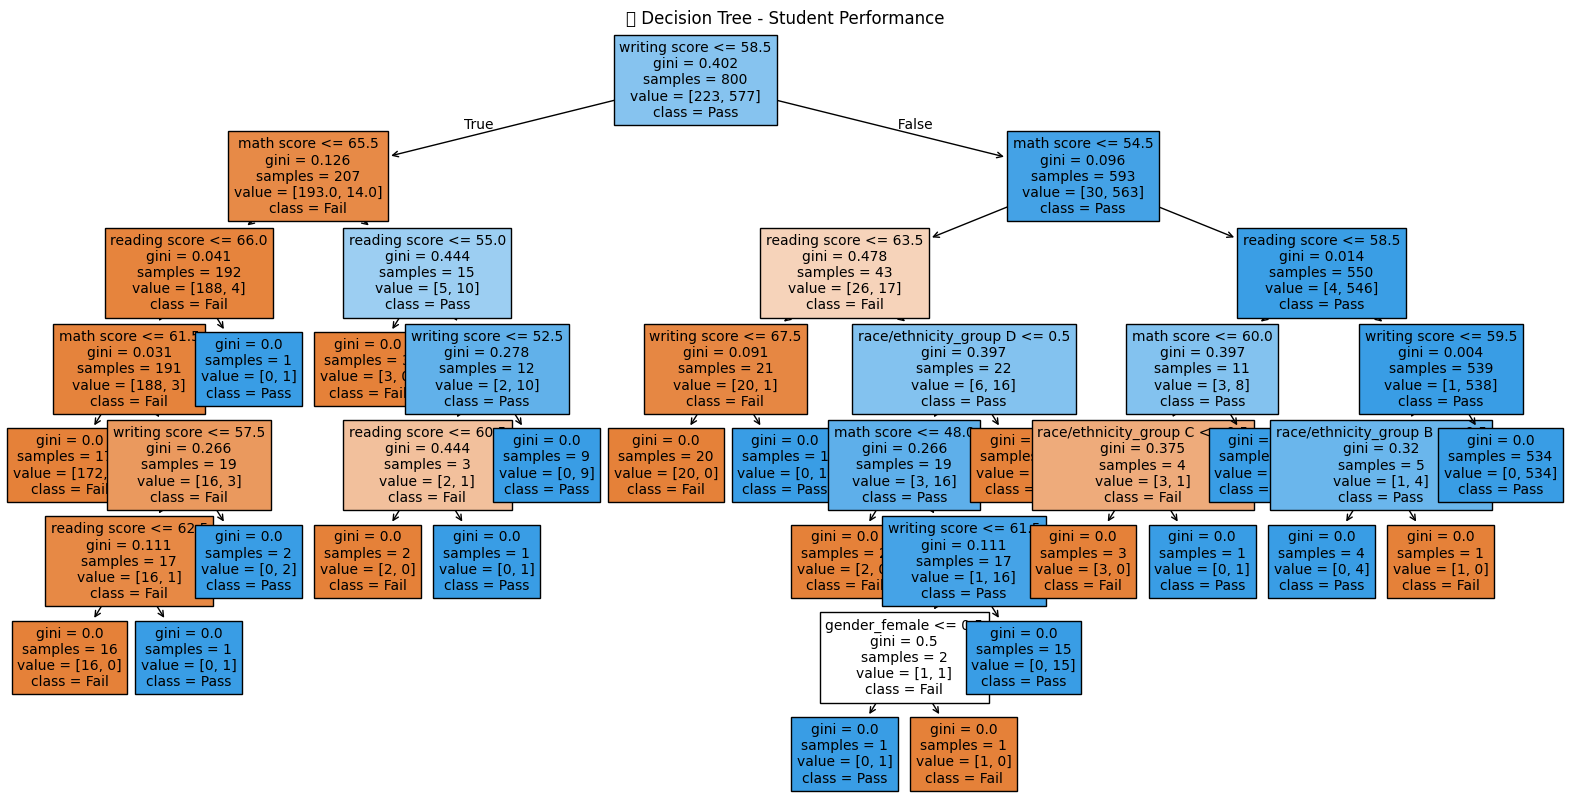

In [29]:
# STEP 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from google.colab import files

# STEP 2: Upload your file
uploaded = files.upload()  # You will be prompted to upload StudentsPerformance.csv

# STEP 3: Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# STEP 4: Add total_score and pass/fail column
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["pass"] = df["total_score"].apply(lambda x: 1 if x >= 180 else 0)

# STEP 5: Encode categorical columns
df_encoded = pd.get_dummies(df[["gender", "race/ethnicity", "parental level of education",
                                "lunch", "test preparation course"]])
X = pd.concat([df_encoded, df[["math score", "reading score", "writing score"]]], axis=1)
y = df["pass"]

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# STEP 8: Predict and evaluate
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Confusion Matrix:\n", conf_matrix)
print("\n📋 Classification Report:\n", report)

# STEP 9: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Fail", "Pass"], fontsize=10)
plt.title("🎓 Decision Tree - Student Performance")
plt.show()


***Summary***

This project focuses on predicting student academic success using machine learning techniques, particularly a Decision Tree Classifier. The analysis is based on the StudentsPerformance.csv dataset, which includes student demographic details and scores in Math, Reading, and Writing.The dataset was enhanced by calculating a total score and defining a binary pass/fail outcome based on a threshold (e.g., total score ≥ 180 = pass). Categorical features like gender, race/ethnicity, parental education, lunch type, and test preparation were encoded using one-hot encoding.A Decision Tree Classifier was trained on this processed data to classify students into pass or fail categories. The model achieved an impressive accuracy of 96%, with strong precision and recall scores, indicating high reliability in predicting student performance.Additionally, the decision tree was visualized to show how different features influence the prediction. This visualization can help educators understand which student attributes most significantly impact academic outcomes.



***Future Work***

To further improve and expand the project, consider the following:


Use More Advanced Models: Try Random Forests, XGBoost, or Gradient Boosting for better accuracy.

Feature Engineering: Include attendance, homework scores, or behavioral data.

Multiclass Classification: Instead of binary pass/fail, predict grade categories (A, B, C, etc.).

Web App Deployment: Use Streamlit to build a web-based predictor for teachers or students.

Model Explainability: Integrate SHAP or LIME for interpreting feature importance.



